In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.adjmat = []
        
        for i in range(n):
            self.adjmat.append([0 for j in range(n)])
        
        self.g = nx.from_numpy_matrix(np.matrix(self.adjmat), create_using=nx.Graph())
        self.pos = nx.spring_layout(self.g)
        
        
    def addedge(self, u, v):
        self.adjmat[u][v] = 1
        self.adjmat[u][v] = 1
        
        self.g = nx.from_numpy_matrix(np.matrix(self.adjmat), create_using=nx.Graph())
        self.pos = nx.spring_layout(self.g)
        
        
    def visualize(self):
        nx.draw_networkx(self.g, self.pos, width=3, with_labels=False)
        plt.show()
        
    def colorbi(self, nodecolor):
        color1 = []
        color2 = []
        
        for i in range(self.n):
            if nodecolor[i] == 0:
                color1.append(i)
            else:
                color2.append(i)
        
        nx.draw_networkx_nodes(self.g, self.pos, color1, node_color='r')
        nx.draw_networkx_nodes(self.g, self.pos, color2, node_color='b')
        nx.draw_networkx_edges(self.g, self.pos, width=3, edge_color='g')
        plt.show()

In [3]:
def colorbipartite(graph):
    nodecolors = [0 for i in range(graph.n)]
    visited = set()
    
    for i in range(graph.n):
        if i not in visited:
            if not dfs(graph, i, visited, 0, nodecolors):
                print("The graph cannot be colored...")
                return

    print("The required bipartite coloring is")
    graph.colorbi(nodecolors)
    
    

def dfs(graph, v, visited, curr, nodecolors):
    nodecolors[v] = curr
    visited.add(v)
    
    for i in range(graph.n):
        if graph.adjmat[v][i] == 1:
            if i in visited:
                if nodecolors[i] == curr:
                    return False
            else:
                nxt = 0 if curr == 1 else 1 
                if not dfs(graph, i, visited, nxt, nodecolors):
                    return False
    
    return True

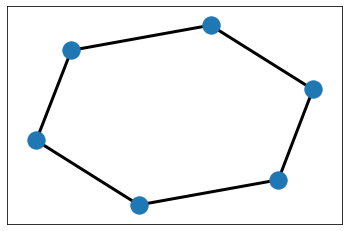

In [10]:
edges = [(0,1), (1, 2), (2,3), (3,4), (4,5), (5,0)]

g = Graph(6)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

The required bipartite coloring is


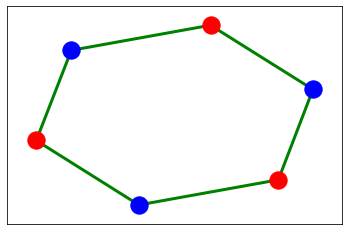

In [11]:
colorbipartite(g)

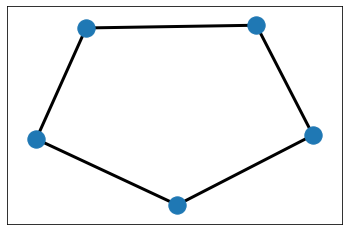

In [6]:
edges = [(0,1), (1, 2), (2,3), (3,4), (4,0)]

g = Graph(5)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

In [7]:
colorbipartite(g)

The graph cannot be colored...


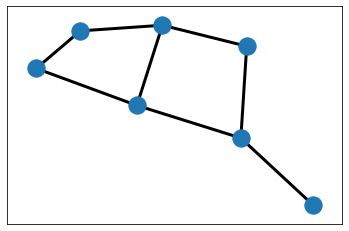

In [8]:
edges = [(0,1), (0,2), (0,3), (1,4), (2,4), (2,5), (3,5), (5,6)]

g = Graph(7)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

The required bipartite coloring is


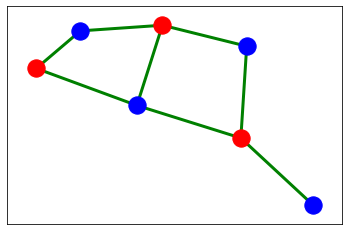

In [9]:
colorbipartite(g)